In [ ]:
! pip install alerce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.


In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from alerce.core import Alerce
# import psycopg2
import json
import tensorflow as tf 
from sklearn.model_selection import train_test_split
import os
import itertools

import warnings
warnings.filterwarnings('ignore')

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
path = "/gdrive/MyDrive/Colab Notebooks/ALeRCE_ML_DL/data/"

In [ ]:
df_features = pd.read_parquet(path + "features_labels.parquet")
df_test = pd.read_parquet (path + "test_set.parquet")
df_train = pd.read_parquet (path + "train_set.parquet")
df_train_ss = pd.read_parquet (path + "train_set_ss.parquet")

In [ ]:
alerce_client = Alerce()

In [ ]:
oid = 'ZTF20aaelulu'
light_curve = alerce_client.query_detections(oid, format='pandas')


In [ ]:
for c in light_curve.columns:
    print (c)

tid
mjd
candid
fid
pid
diffmaglim
isdiffpos
nid
distnr
magpsf
magap
sigmapsf
sigmagap
ra
dec
rb
rbversion
drb
magapbig
sigmagapbig
rfid
has_stamp
corrected
dubious
step_id_corr
phase
parent_candid
magpsf_corr
sigmapsf_corr
sigmapsf_corr_ext


In [ ]:
oids = [
    "ZTF18accqogs",
    "ZTF19aakyhxi",
    "ZTF19abyylzv",
    "ZTF19acyfpno",
]
objects = alerce_client.query_objects(oid=oids, format="pandas")

In [ ]:
objects

,oid,ndethist,ncovhist,mjdstarthist,mjdendhist,corrected,stellar,ndet,g_r_max,g_r_max_corr,...,lastmjd,deltajd,meanra,meandec,sigmara,sigmadec,class,classifier,probability,step_id_corr
0,ZTF18accqogs,3,60,58426.228657,58426.231505,False,False,2,0.661297,NaN,...,58426.231505,0.002847,3.694674,-7.355086,0.000164,0.000146,None,None,None,corr_bulk_0.0.1
1,ZTF19aakyhxi,2,142,58538.172153,58562.130127,False,False,4,1.148241,NaN,...,58562.130127,23.957975,92.708387,35.647012,0.000026,0.000067,None,None,None,corr_bulk_0.0.1
2,ZTF19abyylzv,1,94,58741.337303,58741.337303,False,False,1,NaN,NaN,...,58741.337303,0.000000,335.804957,1.821680,NaN,NaN,None,None,None,corr_bulk_0.0.1
3,ZTF19acyfpno,4,489,58819.151076,58830.232905,True,False,4,0.358120,0.510152,...,58830.232905,11.081829,30.456234,29.104072,0.000051,0.000057,None,None,None,corr_bulk_0.0.1


In [ ]:
for c in objects.columns:
    print (c)

oid
ndethist
ncovhist
mjdstarthist
mjdendhist
corrected
stellar
ndet
g_r_max
g_r_max_corr
g_r_mean
g_r_mean_corr
firstmjd
lastmjd
deltajd
meanra
meandec
sigmara
sigmadec
class
classifier
probability
step_id_corr


In [ ]:
# credentials_file = "alercereaduser_v4.json"
# with open(credentials_file) as jsonfile:
#     params = json.load(jsonfile)["params"]
# conn = psycopg2.connect(
#     dbname=params['dbname'], 
#     user=params['user'], 
#     host=params['host'], 
#     password=params['password'])

In [ ]:
# %%time
# base_query = """SELECT oid, ra ,dec, mjd, fid, magpsf, sigmapsf, magpsf_corr, sigmapsf_corr, sigmapsf_corr_ext, rb, corrected
#     FROM detection  
#     WHERE oid IN (%s)"""

# batch = pd.concat((df_train_ss["oid"], df_test["oid"])).values[:1000]
# #batch = df_train_ss["oid"].values
# batch = [f"'{o}'" for o in batch]
# batch = ",".join(batch)

# query = base_query % batch

# df_lightcurves = pd.read_sql(query, conn)

In [ ]:
# # If you do not have the data, this takes between 1 and 2 hours to run
# %%time

# base_query = """SELECT oid, ra ,dec, mjd, fid, magpsf, sigmapsf, magpsf_corr, sigmapsf_corr, sigmapsf_corr_ext, rb, corrected
#     FROM detection  
#     WHERE oid IN (%s)"""
# df_lightcurves = pd.DataFrame (columns= ["oid", "ra" ,"dec", "mjd", "fid", "magpsf", "sigmapsf", 
#                               "magpsf_corr", "sigmapsf_corr", "sigmapsf_corr_ext", 
#                               "rb", "corrected"])

# for i, batch in enumerate(np.array_split (pd.concat((df_train_ss["oid"], df_test["oid"])).values, 30)):
#     print (i, batch.shape)
#     #batch = pd.concat((df_train_ss["oid"], df_test["oid"])).values[:1000]
#     #batch = df_train_ss["oid"].values
#     fn = "data/lightcurves_" + str(i) + "_" + str(len(batch)) + ".parquet"
#     if os.path.exists (fn):
#         #df_lightcurves = pd.concat ([df_lightcurves, pd.read_parquet(fn)])
#         df_lightcurves = pd.read_parquet(fn)
#         print (fn + " read")
#         continue

#     batch = [f"'{o}'" for o in batch]
#     batch = ",".join(batch)

#     query = base_query % batch

#     #df_lightcurves = pd.concat ([df_lightcurves, pd.read_sql(query, conn)])
#     df_lightcurves = pd.read_sql(query, conn)
#     df_lightcurves.to_parquet (fn)

In [ ]:
filename = path + "lightcurves.parquet"

if os.path.exists (filename):
    df_lightcurves = pd.read_parquet (filename)
else:
    df_lightcurves = pd.DataFrame (columns= ["oid", "ra" ,"dec", "mjd", "fid", "magpsf", "sigmapsf", 
                                  "magpsf_corr", "sigmapsf_corr", "sigmapsf_corr_ext", 
                                  "rb", "corrected"])

    # concatenate the data
    for i, batch in enumerate(np.array_split (pd.concat((df_train_ss["oid"], df_test["oid"])).values, 30)):
        print (i, batch.shape)
        fn = "data/lightcurves_" + str(i) + "_" + str(len(batch)) + ".parquet"
        df_file = pd.read_parquet(fn)

        df_lightcurves = pd.concat ([df_lightcurves, df_file])
    df_lightcurves.to_parquet (path + "lightcurves.parquet")

In [ ]:
df_lightcurves = df_lightcurves.reset_index()

In [ ]:
# filename = './data/lightcurves_0_2498.parquet'
# df_lightcurves = pd.read_parquet (filename)
# df_lightcurves.head()

In [ ]:
df_lightcurves.shape

(16823968, 13)

In [ ]:
df_lightcurves['corrected'] = df_lightcurves['corrected'].astype('bool')


In [ ]:
df_lightcurves['corrected'].value_counts()

True     16672142
False      151826
Name: corrected, dtype: int64

In order to avoid spurious points in the light curves, we removed observations with a ZTF real-bogus score lower than 0.55, magnitude errors higher than 1, or magnitudes higher than 23. We used the corrected light curves  to take into account the use of difference image fluxes as described in Sanchez et.al. 2021.

In [ ]:
df_lightcurves

,index,oid,ra,dec,mjd,fid,magpsf,sigmapsf,magpsf_corr,sigmapsf_corr,sigmapsf_corr_ext,rb,corrected
0,0,ZTF17aaapukq,177.366572,14.333978,58636.247350,1,19.764230,0.138408,17.350574,0.004586,0.014987,0.910000,True
1,1,ZTF17aaapukq,177.366666,14.333960,58639.175787,2,19.352100,0.211374,17.330643,0.029936,0.032845,0.601429,True
2,2,ZTF17aaapukq,177.366628,14.333984,58653.187072,2,19.153150,0.131968,17.297235,0.019968,0.023884,0.928571,True
3,3,ZTF17aaapukq,177.366619,14.333919,58658.178160,2,19.194826,0.181321,17.304659,0.028930,0.031797,0.735714,True
4,4,ZTF17aaapukq,177.366719,14.333855,58658.192824,1,19.594015,0.133610,17.330803,0.008936,0.016617,0.840000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16823963,539805,ZTF20abbpows,283.126455,40.318581,59366.307072,1,20.553555,0.209635,19.929937,0.110820,0.118036,0.862857,True
16823964,539806,ZTF20abbpows,283.126625,40.318532,59670.476273,2,20.299600,0.236194,19.533855,0.110533,0.116673,0.694286,True
16823965,539807,ZTF20abbpows,283.126451,40.318496,59670.501667,1,20.952700,0.341988,19.756498,0.108232,0.113640,0.835714,True
16823966,539808,ZTF20abbpows,283.126482,40.318537,59675.494618,1,20.553300,0.280371,19.930080,0.152603,0.157923,0.765714,True


In [ ]:
# Filter for ZTF's real-bogus score
df_lightcurves = df_lightcurves[df_lightcurves['rb'] >= 0.55]

# Select magnitudes and errors based on whether they were corrected or not
df_lightcurves['mag'] = df_lightcurves['magpsf_corr']
df_lightcurves['err'] = df_lightcurves['sigmapsf_corr_ext']
df_lightcurves['mag'][~df_lightcurves['corrected']] = df_lightcurves['magpsf'][~df_lightcurves['corrected']]
df_lightcurves['err'][~df_lightcurves['corrected']] = df_lightcurves['sigmapsf'][~df_lightcurves['corrected']]

# Filter for magnitude and their errors 
df_lightcurves = df_lightcurves[(df_lightcurves['err'] < 1) & (df_lightcurves['mag'] < 23)]

In [ ]:
def fn(x):
    ret = x[["mjd", "mag", "err", "fid"]].values.transpose()
    ret[0] = ret[0] - np.min(ret[0])
    return ret

In [ ]:
df_lightcurves = df_lightcurves.groupby ("oid").apply (lambda x: fn(x)).reset_index()

KeyError: ignored

In [ ]:
df_lightcurves

,oid,data,classALeRCE,top_label,label
0,ZTF17aaaaasi,"[[0.0, 1.0057291998527944, 1.9984144000336528,...",LPV,Periodic,0
1,ZTF17aaaaast,"[[0.0, 2.0370717998594046, 11.9921875, 14.9962...",LPV,Periodic,0
2,ZTF17aaaaasx,"[[0.0, 0.9889120999723673, 6.1132871001027524,...",LPV,Periodic,0
3,ZTF17aaaaatf,"[[0.0, 0.9986574002541602, 2.0008912002667785,...",LPV,Periodic,0
4,ZTF17aaaaavq,"[[0.0, 0.9787037000060081, 1.0063542001880705,...",LPV,Periodic,0
...,...,...,...,...,...
74925,ZTF20abcvfqq,"[[0.0, 14.867198999971151, 15.939016200136393,...",QSO,Stochastic,1
74926,ZTF20abcvfvi,"[[0.0, 10.845370300114155, 10.851817100308836,...",QSO,Stochastic,1
74927,ZTF20abcvfwc,"[[0.0, 11.957835599780083, 13.875729199964553,...",QSO,Stochastic,1
74928,ZTF20abcvgqu,"[[0.0, 11.975567099638283, 13.047384299803525,...",QSO,Stochastic,1


In [ ]:
df_lightcurves= df_lightcurves.rename(columns={0: "data"})

In [ ]:
# for d in df_lightcurves['data'][100][0]:
#     print (d)

In [ ]:
# Add labels
df_labels = pd.read_csv (path + "labeled_set_lc_classifier_SanchezSaez_2020.csv")

dict_top = {
    'LPV': "Periodic",
    'Periodic-Other': "Periodic", 
    'E': "Periodic",
    'DSCT': "Periodic",
    'RRL': "Periodic",
    'CEP': "Periodic",
    'SNIa': "Transient",
    'SNIbc': "Transient",
    'SNII': "Transient",
    'SLSN': "Transient",
    'CV/Nova': "Stochastic",
    'YSO': "Stochastic",   
    'AGN': "Stochastic",   
    'QSO': "Stochastic",   
    'Blazar': "Stochastic"    
}

df_labels['top_label'] = df_labels['classALeRCE'].map (dict_top)

In [ ]:
df_labels

,oid,classALeRCE,ra,dec,source,id_source,top_label
0,ZTF19aapcxhy,AGN,154.202129,18.723076,Oh2015,5.877420127343739e+17,Stochastic
1,ZTF18abtmwvo,AGN,46.074050,0.474212,Oh2015,5.880155098263717e+17,Stochastic
2,ZTF18acvgdfy,AGN,134.407409,5.472596,Oh2015,5.877327033915148e+17,Stochastic
3,ZTF19aabvjsi,AGN,132.353298,14.067266,Oh2015,5.877420137987442e+17,Stochastic
4,ZTF18aadyxlg,AGN,125.577004,33.091120,Oh2015,5.880133827239608e+17,Stochastic
...,...,...,...,...,...,...,...
123491,ZTF17aaanrhv,YSO,100.188180,9.478992,Simbad_variables,EM* LkHA 364,Stochastic
123492,ZTF18aabgmld,YSO,100.248642,9.478838,Simbad_variables,V* LV Mon,Stochastic
123493,ZTF17aaarpje,YSO,84.062814,-6.293581,Simbad_variables,V* BB Ori,Stochastic
123494,ZTF18actawih,YSO,83.880279,-5.669713,Simbad_variables,V* V1558 Ori,Stochastic


In [ ]:
df_labels

,oid,classALeRCE,ra,dec,source,id_source,top_label
0,ZTF19aapcxhy,AGN,154.202129,18.723076,Oh2015,5.877420127343739e+17,Stochastic
1,ZTF18abtmwvo,AGN,46.074050,0.474212,Oh2015,5.880155098263717e+17,Stochastic
2,ZTF18acvgdfy,AGN,134.407409,5.472596,Oh2015,5.877327033915148e+17,Stochastic
3,ZTF19aabvjsi,AGN,132.353298,14.067266,Oh2015,5.877420137987442e+17,Stochastic
4,ZTF18aadyxlg,AGN,125.577004,33.091120,Oh2015,5.880133827239608e+17,Stochastic
...,...,...,...,...,...,...,...
123491,ZTF17aaanrhv,YSO,100.188180,9.478992,Simbad_variables,EM* LkHA 364,Stochastic
123492,ZTF18aabgmld,YSO,100.248642,9.478838,Simbad_variables,V* LV Mon,Stochastic
123493,ZTF17aaarpje,YSO,84.062814,-6.293581,Simbad_variables,V* BB Ori,Stochastic
123494,ZTF18actawih,YSO,83.880279,-5.669713,Simbad_variables,V* V1558 Ori,Stochastic


In [ ]:
df_lightcurves = df_lightcurves.merge(df_labels[["oid", "classALeRCE", 'top_label']], how = "inner", right_on="oid", left_on='oid')


In [ ]:
df_lightcurves

,oid,data,classALeRCE,top_label
0,ZTF17aaaaasi,"[[0.0, 1.0057291998527944, 1.9984144000336528,...",LPV,Periodic
1,ZTF17aaaaast,"[[0.0, 2.0370717998594046, 11.9921875, 14.9962...",LPV,Periodic
2,ZTF17aaaaasx,"[[0.0, 0.9889120999723673, 6.1132871001027524,...",LPV,Periodic
3,ZTF17aaaaatf,"[[0.0, 0.9986574002541602, 2.0008912002667785,...",LPV,Periodic
4,ZTF17aaaaavq,"[[0.0, 0.9787037000060081, 1.0063542001880705,...",LPV,Periodic
...,...,...,...,...
74925,ZTF20abcvfqq,"[[0.0, 14.867198999971151, 15.939016200136393,...",QSO,Stochastic
74926,ZTF20abcvfvi,"[[0.0, 10.845370300114155, 10.851817100308836,...",QSO,Stochastic
74927,ZTF20abcvfwc,"[[0.0, 11.957835599780083, 13.875729199964553,...",QSO,Stochastic
74928,ZTF20abcvgqu,"[[0.0, 11.975567099638283, 13.047384299803525,...",QSO,Stochastic


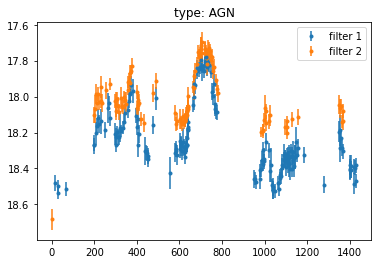

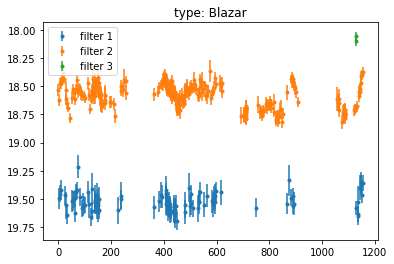

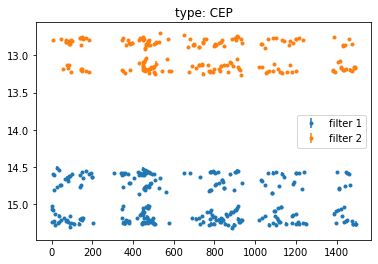

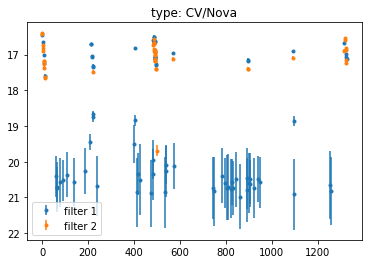

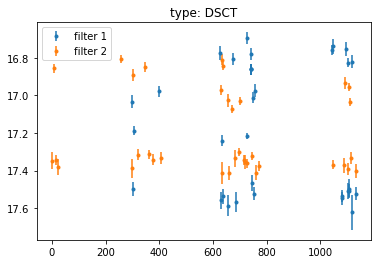

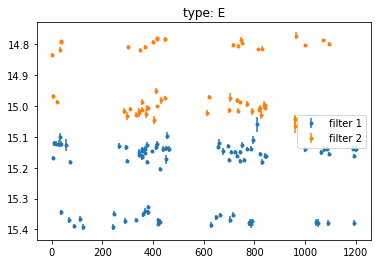

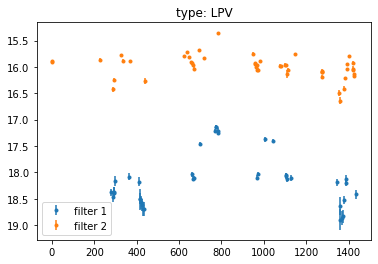

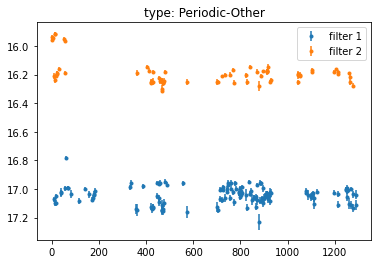

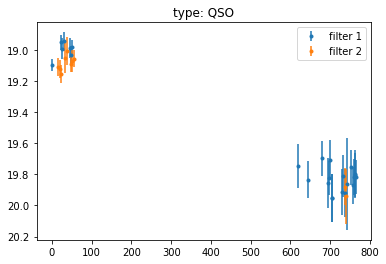

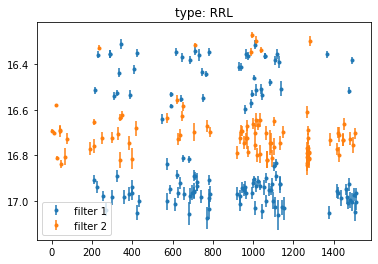

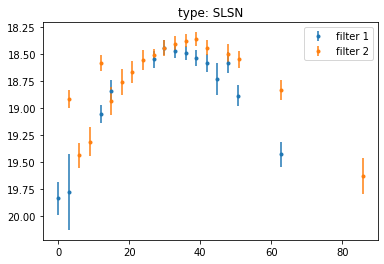

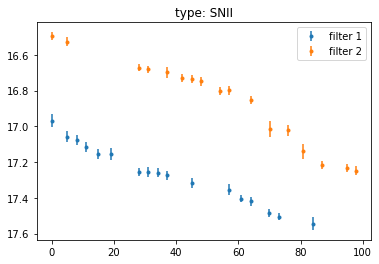

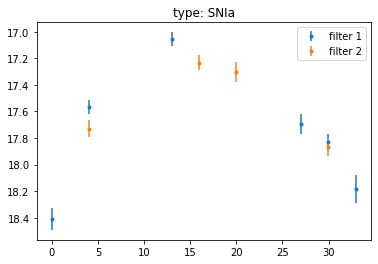

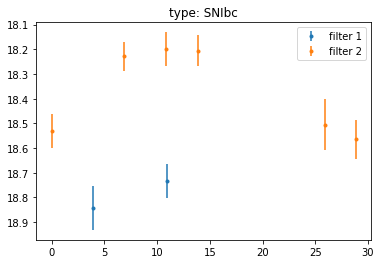

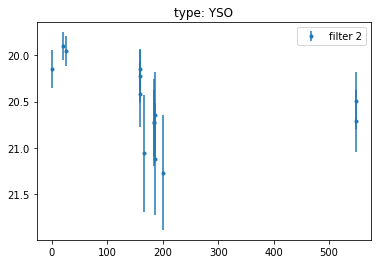

In [ ]:
for i, r in df_lightcurves.groupby('classALeRCE').apply(lambda x: x.sample(1)).iterrows():
    for fid in np.unique(r['data'][3]):
        plt.errorbar(r['data'][0][r['data'][3] == fid], 
                     r['data'][1][r['data'][3] == fid], 
                     yerr = r['data'][2][r['data'][3] == fid], 
                     label = "filter " + str(int(fid)), ls = "", marker = ".")
    plt.title("type: " + r['classALeRCE'])
    plt.legend()
    plt.gca().invert_yaxis()
    plt.show()

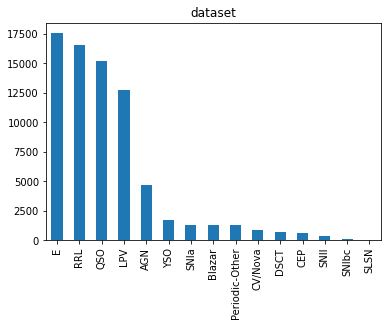

In [ ]:
df_lightcurves['classALeRCE'].value_counts().plot(kind='bar', title = "dataset")

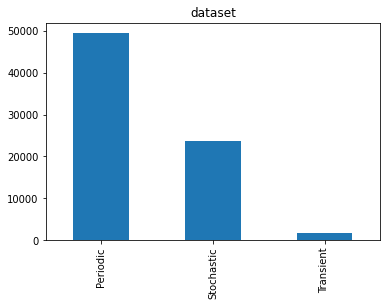

In [ ]:
df_lightcurves['top_label'].value_counts().plot(kind='bar', title = "dataset")

## Data preprocessing using tf.Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
INP_DIM = 4 # Number of attributes e.g., mjd, magnitudes, errors...
NUM_CLS = len(df_lightcurves['top_label'].unique())
BATCH_SIZE = 128 # Training batch size

In [ ]:
NUM_CLS

3

In [ ]:
len(df_lightcurves['top_label'].unique())

3

In [ ]:
labels = df_lightcurves['top_label'].unique()
df_lightcurves['label'] = df_lightcurves['top_label'].replace (labels, 
                                                      np.arange (NUM_CLS), 
                                                      inplace = False)

In [ ]:
numpy_lcs = df_lightcurves['data'].values  # lightcurves
numpy_lbs = df_lightcurves['label'].values #labels
numpy_lbs = pd.get_dummies(numpy_lbs).values #onehot
assert numpy_lbs.shape[-1] == NUM_CLS
assert (numpy_lbs.sum(axis = 1) != 1).sum() == 0

In [ ]:
print (numpy_lcs.shape, numpy_lbs.shape)

(74930,) (74930, 3)


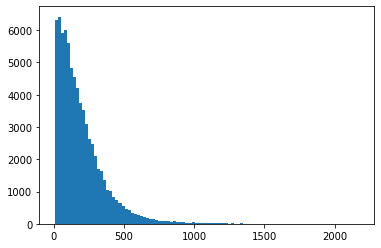

In [ ]:
lengths = [x.shape[1] for x in numpy_lcs]
plt.figure()
plt.hist(lengths, bins=100)
plt.show()

In [ ]:
np.percentile(lengths, 20)

57.0

## Creating windows and padding

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def create_windows(lightcurves, labels, labels_str, winsize=100):
    padded = 0
    d_padded = dict()
    d_unpadded = dict()
    for l in labels_str:
        d_padded[l] = 0
        d_unpadded[l] = 0
    with tf.device('/CPU:0'):
        windows = []
        win_labels = []
        for index, lc in enumerate(lightcurves):
            lc = lc - np.mean(lc, 1)[:, None]
            pivots = np.arange(0, lc.shape[1], winsize)
            for pivot in pivots:
                window = lc[:, pivot:pivot+winsize]
                if window.shape[1] < winsize:
                    window = pad_sequences(window, 
                                           maxlen=winsize, 
                                           padding='post', 
                                           dtype='float32')
                    padded += 1
                    d_padded[labels_str[np.argmax(labels[index])]] += 1
                else:
                    d_unpadded[labels_str[np.argmax(labels[index])]] += 1
                win_labels.append(labels[index])
                windows.append(window.T)
        windows = np.array(windows)
        win_labels = np.array(win_labels)
        print ("padded = ", padded, " of ", windows.shape[0])
        print (d_padded)
        print (d_unpadded)
        return windows, win_labels

In [ ]:
def uniform_set_sample (x, y, test_size):
  x1, x2 = np.array([]).reshape(0,x.shape[1]), np.array([]).reshape(0,x.shape[1])
  y1, y2 = np.array([]).reshape(0,y.shape[1]), np.array([]).reshape(0,y.shape[1])
  x_left = x.copy()
  y_left = y.copy()
  for i in range (y.shape[1]):
    num_per_class = np.array(y_left).sum(axis = 0)
    #print (i, num_per_class[i])
    p_true = test_size/num_per_class[i]
    flag = np.random.choice(a=[True, False], size=num_per_class[i], p = [p_true, 1-p_true])
    i_flag = np.arange(num_per_class[i])
    np.random.shuffle(y_left[:, i] == 1][i_flag])
    print ("iflag ",i_flag)
    print (i, y_left[y_left[:, i] == 1][flag])
    print ("x", x_left[y_left[:, i] == 1][flag])
    y2 = np.vstack ((y2, y_left[y_left[:, i] == 1][flag]))
    y_left = y_left[y_left[:, i] == 1][~flag]
    #print (x1, x[y[:, i] == 1][~flag])
    x2 = np.vstack ((x2, x_left[y_left[:, i] == 1][flag]))
    x_left = x_left[y_left[:, i] == 1][~flag]
  return x_left, x2, y_left, y2

SyntaxError: ignored

In [ ]:
y_foo = [[0, 1],
         [0, 1],
         [0, 1],
         [1, 0],
         [1, 0],
         [0, 1],
         [0, 1],
         [0, 1],
         [1, 0],
         [1, 0]]
y_foo = np.array(y_foo)
x_foo = np.arange(len(y_foo)).reshape(y_foo.shape[0], 1)
print (y_foo.shape, x_foo.shape)
print (uniform_set_sample (x_foo, y_foo, 2))

In [ ]:
np.random.choice(a=[False, True], size=10, p = [0.3, 0.7])

array([ True, False, False,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
x_train, x_rest, \
y_train, y_rest = train_test_split(numpy_lcs, numpy_lbs, 
                                   test_size=0.3, random_state=53)

x_val, x_test, \
y_val, y_test = train_test_split(x_rest, y_rest, 
                                   test_size=0.5, random_state=53)

In [ ]:
print (y_train.sum(axis = 0), y_val.sum(axis = 0), y_test.sum(axis = 0))

[34573 16707  1171] [7430 3538  271] [7473 3491  276]


In [ ]:
numpy_lcs.shape

(74930,)

In [ ]:
y_val.shape

(11239, 3)

In [ ]:
WINDOW_SIZE = 40

print ((np.array(lengths) < WINDOW_SIZE).sum()/len(lengths))

0.1309488856265848


In [ ]:
%%time

x_train_pad, y_train_pad = create_windows(x_train, y_train, labels, winsize=WINDOW_SIZE)
x_val_pad, y_val_pad   = create_windows(x_val, y_val, labels, winsize=WINDOW_SIZE)
x_test_pad, y_test_pad   = create_windows(x_test, y_test, labels, winsize=WINDOW_SIZE)

padded =  51218  of  277296
{'Periodic': 33714, 'Stochastic': 16340, 'Transient': 1164}
{'Periodic': 171435, 'Stochastic': 54268, 'Transient': 375}
padded =  10992  of  59307
{'Periodic': 7268, 'Stochastic': 3454, 'Transient': 270}
{'Periodic': 36518, 'Stochastic': 11737, 'Transient': 60}
padded =  10963  of  59042
{'Periodic': 7274, 'Stochastic': 3417, 'Transient': 272}
{'Periodic': 36680, 'Stochastic': 11328, 'Transient': 71}
CPU times: user 7.59 s, sys: 686 ms, total: 8.28 s
Wall time: 8.26 s


In [ ]:
def balance_dataset(lightcurves, one_hot_labels, max_per_class=None):
    labels = np.argmax(one_hot_labels, 1)
    uniques, counts = np.unique(labels, return_counts=True)
    if max_per_class is None:
        max_per_class = max(counts)
    
    oversampled = []
    new_labels  = []
    for c in uniques:
        subset = lightcurves[labels == c]
        subset = subset[np.random.choice(subset.shape[0], 
                        max_per_class, replace=True), :]
        oversampled.append(subset)
        new_labels.append([one_hot_labels[labels==c][0]]*max_per_class)
    return np.concatenate(oversampled, 0), \
           np.concatenate(new_labels, 0)

In [ ]:
y_train_pad

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

<BarContainer object of 3 artists>

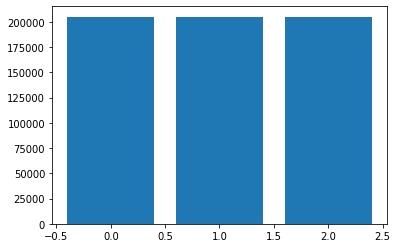

In [ ]:
x_train_bal, y_train_bal = balance_dataset(x_train_pad, 
                                           y_train_pad,
                                           max_per_class=None)
uniques, counts = np.unique(np.argmax(y_train_bal, 1), return_counts=True)

plt.bar(range(len(uniques)), counts)

## Long Short Term Memory

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, LSTM, Dropout, Input, BatchNormalization, Masking
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:
print (x_train_bal.shape)
mask = Masking()
foo = mask (x_train_bal[x_train_bal[:, -1, 0] == 0])
foo._keras_mask

(615447, 40, 4)


<tf.Tensor: shape=(236166, 40), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

In [ ]:
# Params 
n_neurons    = 32  # Neurons in each gate of LSTM
dropout_prob = 0.3 # Fraction of the units to drop 

In [ ]:
model = Sequential(
[
    Input(shape=(WINDOW_SIZE, INP_DIM)),
    Masking(),
    LSTM(n_neurons, return_sequences=True, dropout=dropout_prob),
    LSTM(n_neurons, dropout=dropout_prob),
    Dense(n_neurons, activation='relu'),
    Dense(NUM_CLS, activation='softmax')
]
)

In [ ]:
model.compile(optimizer=Adam (learning_rate = 1e-2),
              loss=CategoricalCrossentropy(from_logits=False),
              metrics=['acc'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_13 (Masking)        (None, 40, 4)             0         
                                                                 
 lstm_22 (LSTM)              (None, 40, 32)            4736      
                                                                 
 lstm_23 (LSTM)              (None, 32)                8320      
                                                                 
 dense_22 (Dense)            (None, 32)                1056      
                                                                 
 dense_23 (Dense)            (None, 3)                 99        
                                                                 
Total params: 14,211
Trainable params: 14,211
Non-trainable params: 0
_________________________________________________________________


In [ ]:
i_shuffle = np.arange(y_train_bal.shape[0])
np.random.shuffle(i_shuffle)

history = model.fit(x=x_train_bal[i_shuffle], y=y_train_bal[i_shuffle], 
                    epochs=1000,
                    batch_size=2048,
                    validation_data=(x_val_pad, y_val_pad),
                    shuffle=True,
                    callbacks = [EarlyStopping(patience=10, restore_best_weights = True)])

Epoch 1/1000
224/301 [=====================>........] - ETA: 50s - loss: 0.5501 - acc: 0.7212

KeyboardInterrupt: ignored

In [ ]:
! nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

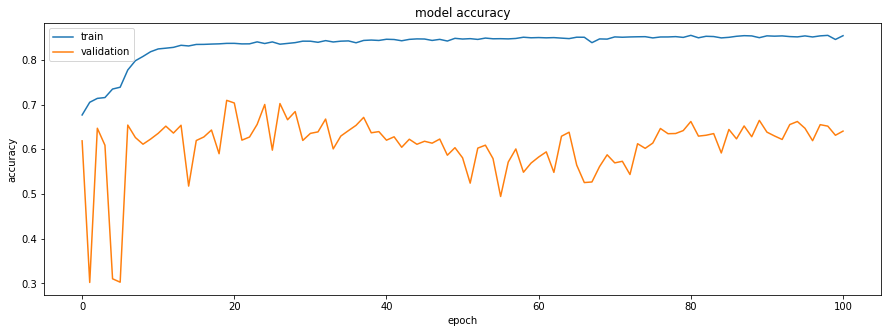

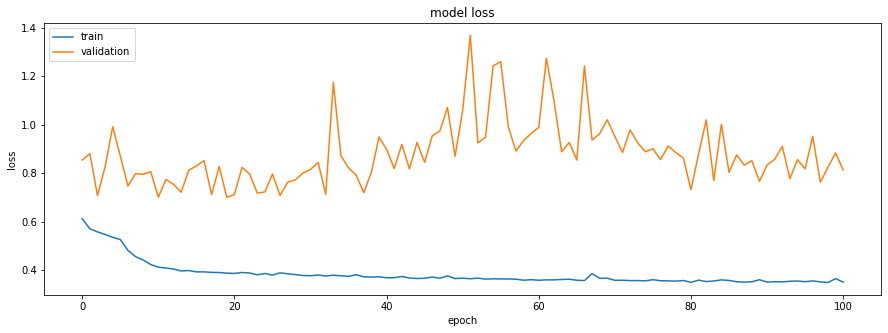

In [ ]:
# summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_probas = model.predict(x_test_pad)
y_pred   = np.argmax(y_probas, axis=1)
y_true   = np.argmax(y_test_pad, axis=1)

acc_test = accuracy_score(y_true, y_pred)
f1_score = f1_score(y_true, y_pred, average='macro') 
print('Accuracy:{}\nF1:{}'.format(acc_test, f1_score))

Accuracy:0.6253006334473764
F1:0.3992535483376934


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


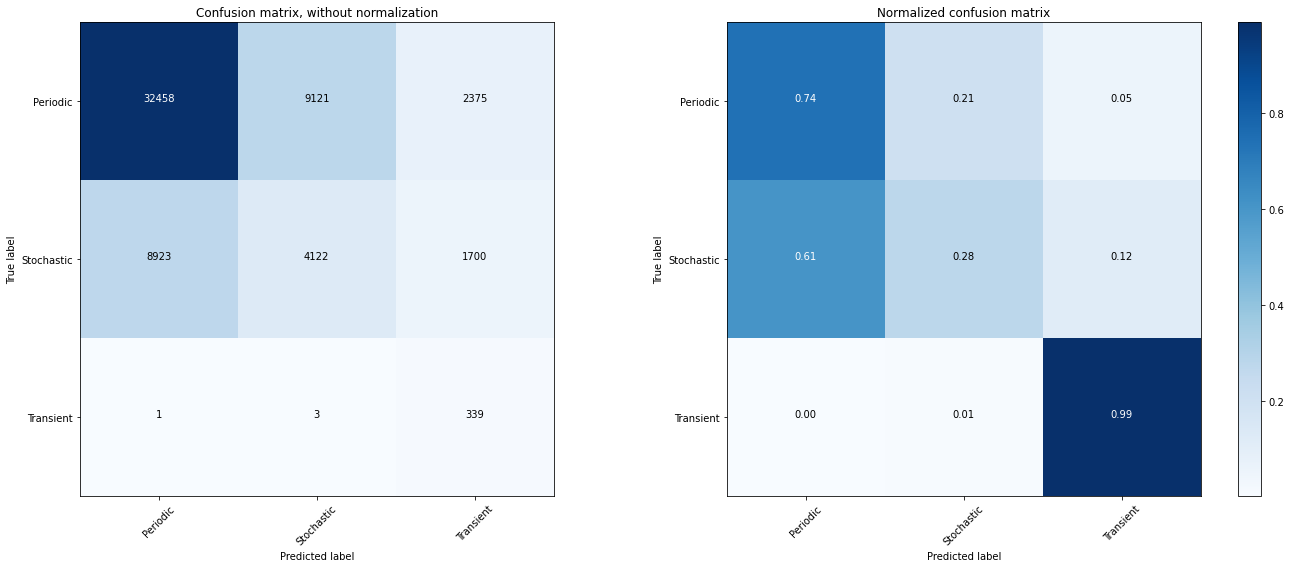

In [ ]:
from sklearn.metrics import confusion_matrix

class_names = labels
cnf_matrix = confusion_matrix(y_true, y_pred)
# Plot non-normalized confusion matrix
plt.figure(figsize=(20,8))
plt.subplot(121)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(122)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [ ]:
print (history)

In [ ]:
## In terms of N
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
i_shuffle = np.arange(y_train_bal.shape[0])
np.random.shuffle(i_shuffle)

Ns = [ 100, 1000, 10000, x_train_bal.shape[0]]
histories = []
models = []
test_metrics = []
for N in Ns:
  print ("starting with ", N)
  model = Sequential(
    [
    Input(shape=(WINDOW_SIZE, INP_DIM)),
    Masking(),
    LSTM(n_neurons, return_sequences=True, dropout=dropout_prob),
    LSTM(n_neurons, dropout=dropout_prob),
    Dense(n_neurons, activation='relu'),
    Dense(NUM_CLS, activation='softmax')
    ]
  )
  model.compile(optimizer=Adam (learning_rate = 1e-2),
              loss=CategoricalCrossentropy(from_logits=False),
              metrics=['acc'])
  print (np.unique(np.argmax(y_train_bal[i_shuffle][:N], axis = 1)))
  history = model.fit(x=x_train_bal[i_shuffle][:N], y=y_train_bal[i_shuffle][:N], 
                    epochs=100,
                    batch_size=2048,
                    validation_data=(x_val_pad, y_val_pad),
                    shuffle=True,
                    callbacks = [EarlyStopping(patience=5, restore_best_weights = True)])
  histories.append(history)
  models.append (model)
  y_probas = model.predict(x_test_pad)
  y_pred   = np.argmax(y_probas, axis=1)
  y_true   = np.argmax(y_test_pad, axis=1)

  acc_test = accuracy_score(y_true, y_pred)
  f1_test = f1_score(y_true, y_pred, average='macro') 
  print('Accuracy:{}\nF1:{}'.format(acc_test, f1_test))
  test_metrics.append([acc_test, f1_test])

starting with  100
[0 1 2]
Epoch 1/100
1/1 [==============================] - 19s 19s/step - loss: 1.0872 - acc: 0.3000 - val_loss: 0.9480 - val_acc: 0.7238
Epoch 2/100
1/1 [==============================] - 7s 7s/step - loss: 0.9651 - acc: 0.6200 - val_loss: 0.8127 - val_acc: 0.7213
Epoch 3/100
1/1 [==============================] - 7s 7s/step - loss: 0.8257 - acc: 0.6600 - val_loss: 0.7426 - val_acc: 0.7145
Epoch 4/100
1/1 [==============================] - 7s 7s/step - loss: 0.7227 - acc: 0.6700 - val_loss: 0.7532 - val_acc: 0.7052
Epoch 5/100
1/1 [==============================] - 9s 9s/step - loss: 0.7080 - acc: 0.6500 - val_loss: 0.7813 - val_acc: 0.7049
Epoch 6/100
1/1 [==============================] - 7s 7s/step - loss: 0.6714 - acc: 0.6500 - val_loss: 0.7365 - val_acc: 0.7152
Epoch 7/100
1/1 [==============================] - 9s 9s/step - loss: 0.6731 - acc: 0.6500 - val_loss: 0.7120 - val_acc: 0.7206
Epoch 8/100
1/1 [==============================] - 8s 8s/step - loss: 0.724

KeyboardInterrupt: ignored

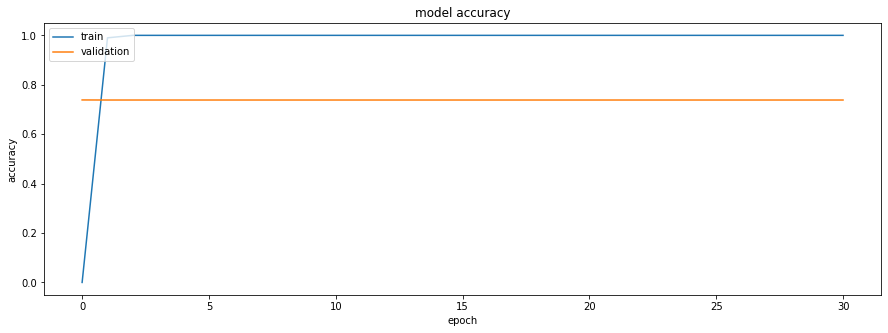

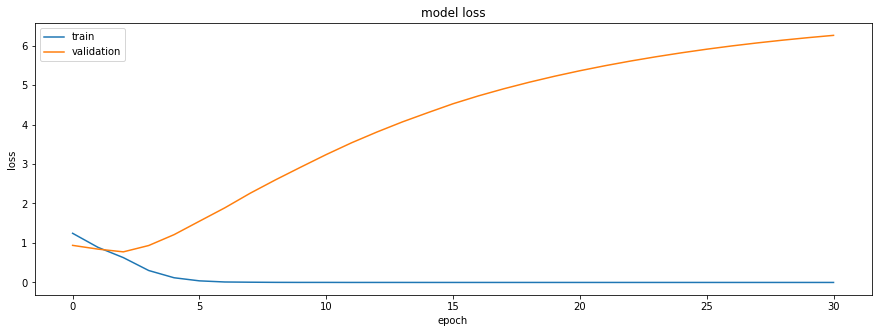

In [ ]:
# summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

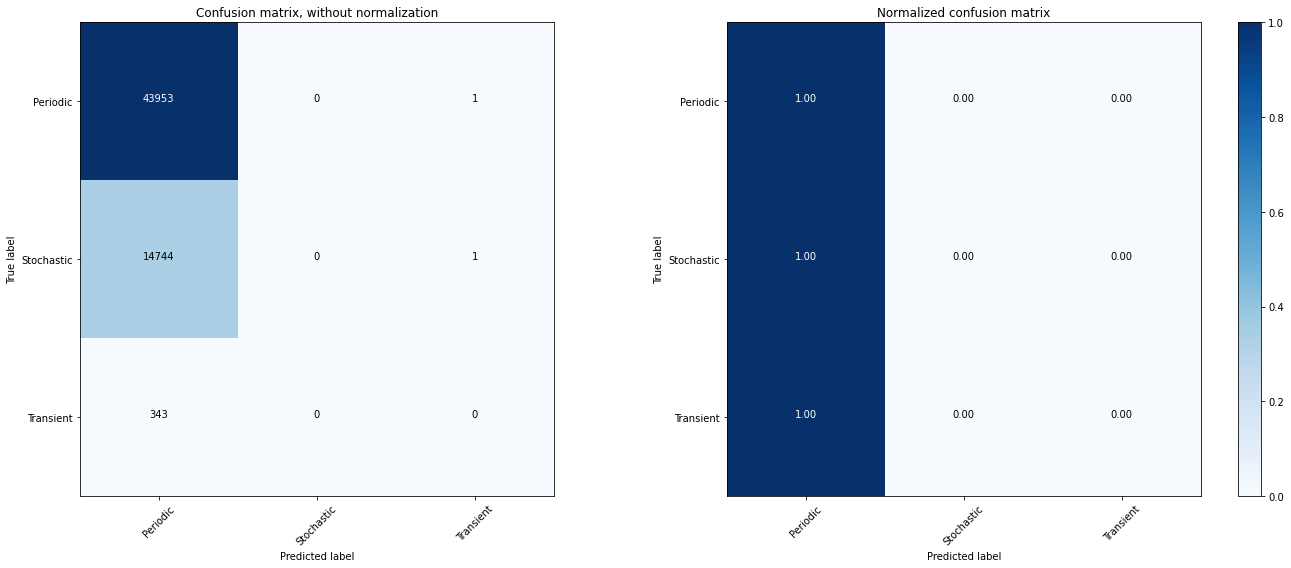

In [ ]:
from sklearn.metrics import confusion_matrix

class_names = labels
cnf_matrix = confusion_matrix(y_true, y_pred)
# Plot non-normalized confusion matrix
plt.figure(figsize=(20,8))
plt.subplot(121)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(122)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [ ]:
i_shuffle

array([168855, 575835, 485647, ..., 565862, 610276, 243704])

In [ ]:
np.unique(np.argmax(y_train_bal[i_shuffle][:10], axis = 1))

array([0, 1, 2])